<b><center>                   1-SALARYDATA.CSV                 </center></b>

<b> Importing the libraries </b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

<b> Loading the dataset </b>

In [62]:
df1=pd.read_csv("SalaryData.csv")

<b>Checking the top 5 records </b>

In [63]:
df1.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


<b> Checking the last 5 records </b>

In [64]:
df1.tail()

,Education,Occupation,Salary
35,Bachelors,Exec-managerial,173935
36,Bachelors,Exec-managerial,212448
37,Bachelors,Exec-managerial,173664
38,Bachelors,Exec-managerial,212760
39,Doctorate,Exec-managerial,212781


<b>Checking the shape and size of the data frame</b>

In [65]:
df1.shape

(40, 3)

In [66]:
df1.dtypes

Education     object
Occupation    object
Salary         int64
dtype: object

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


<b>Checking the summary of the dataframe</b>

In [68]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,40,3,Doctorate,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,40,4,Prof-specialty,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,40.0,NaN,NaN,NaN,162186.875,64860.407506,50103.0,99897.5,169100.0,214440.75,260151.0


In [69]:
df1['Occupation'].unique()

array([' Adm-clerical', ' Sales', ' Prof-specialty', ' Exec-managerial'],
      dtype=object)

In [70]:
#Checking the homogenity of variance
# restructuring the data - with Occupation as individual columns

dfNew_1 = df1.assign(index=df1.groupby('Occupation').Salary.cumcount()).pivot('index','Occupation','Salary')
dfNew_1

dfNew_1.describe()

Occupation,Adm-clerical,Exec-managerial,Prof-specialty,Sales
count,10.000000,5.000000,13.000000,12.000000
mean,141424.300000,197117.600000,168953.153846,157604.416667
std,50713.167251,21287.039703,76815.328725,72012.073563
min,75333.000000,173664.000000,90135.000000,50103.000000
25%,91388.500000,173935.000000,99185.000000,125492.250000
50%,157053.500000,212448.000000,133696.000000,169100.000000
75%,172574.750000,212760.000000,248156.000000,198639.000000
max,220754.000000,212781.000000,257345.000000,260151.000000


In [71]:
df1['Education'].unique()

array([' Doctorate', ' Bachelors', ' HS-grad'], dtype=object)

In [72]:
#Checking the homogenity of variance
# restructuring the data - with Education as individual columns

dfNew_2 = df1.assign(index=df1.groupby('Education').Salary.cumcount()).pivot('index','Education','Salary')
dfNew_2

dfNew_2.describe()

Education,Bachelors,Doctorate,HS-grad
count,15.000000,16.000000,9.000000
mean,165152.933333,208427.000000,75038.777778
std,46596.777211,43070.549855,19839.481632
min,90135.000000,115945.000000,50103.000000
25%,141802.500000,174643.500000,52242.000000
50%,167431.000000,220087.000000,77743.000000
75%,190220.500000,247832.000000,90456.000000
max,260151.000000,257345.000000,100678.000000


<b>1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.</b>

<u><center>Stating the null and alternate hypothesis for conducting one way ANOVA for education</center></u><br>
<center>Null Hypothesis 𝐻0 : The mean salary is same with different categories of education</center><br>

<center>Alternate Hypothesis 𝐻𝐴 : The mean salary is different in at-least one category of education</center><br>
<u><center>Stating the null and alternate hypothesis for conducting one way ANOVA for occupation</center></u><br>
<center>Null Hypothesis 𝐻0 : The mean salary is same with different categories of occupation</center><br>

<center>Alternate Hypothesis 𝐻𝐴 : The mean salary is different in at-least one category of occupation</center><br>

<b>1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.</b>

In [74]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


<b>Conclusion:</b> Since the p value is lesser than the significance level (0.05), we can reject the null hupothesis that the   mean salary due to different levels of education are the same.It means that different levels of education has a significant effect on the mean salary

<b>1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.</b>

In [75]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


<b>Conclusion:</b> Since the p value is greater than the significance level (0.05), we cannot reject the null hupothesis that the mean salary due to different levels of occupation are the same.It means that different levels of occupation does not have a significant effect on the mean salary.

<b>1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.</b>

In [76]:
# tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog = df1['Salary'], groups = df1['Education'], alpha = 0.05 )
print(m_comp)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


<b>Interpretation:</b><br>
    since the mean difference between Bachelors and Doctorate is more it means that their mean salaries are different while the mean salaries for the bachelors-HS grad and Doctorate-HS grad combination are not much

<b>1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.</b>

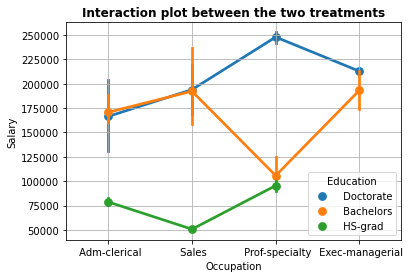

In [77]:
sns.pointplot(x = 'Occupation', y = 'Salary', hue='Education',data=df1)
plt.grid()
plt.title("Interaction plot between the two treatments",fontweight="bold")
plt.show()

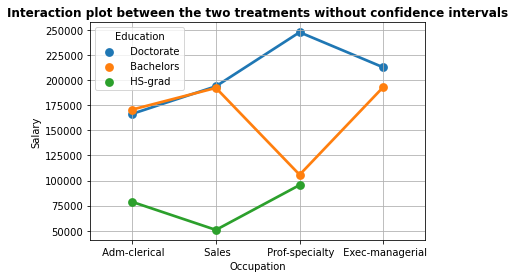

In [78]:
sns.pointplot(x = 'Occupation', y = 'Salary', hue='Education',data=df1,ci= None)
plt.title("Interaction plot between the two treatments without confidence intervals",fontweight="bold")
plt.grid()
plt.show()

In [79]:
#Interaction Effect:Occupation v/s Education
model=ols('Salary~C(Occupation):C(Education)',data=df1).fit()
aov_table=anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Occupation):C(Education)  11.0  1.434497e+11  1.304088e+10  18.339811   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Occupation):C(Education)  3.441555e-10  
Residual                             NaN  


In [80]:
#Interaction Effect:Education v/s Occupation
model=ols('Salary~C(Education):C(Occupation)',data=df1).fit()
aov_table=anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education):C(Occupation)  11.0  1.438019e+11  1.307290e+10  18.384842   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education):C(Occupation)  3.340466e-10  
Residual                             NaN  


<b>1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?</b>

𝐻0  : The means of 'Salary' variable with respect to each occupation category and educational level is equal.

𝐻1 : At least one of the means of 'Salary' variable with respect to each occupation category and educational level is unequal.

In [81]:
formula = 'Salary ~ C(Education) + C(Occupation)+C(Education):C(Occupation)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


<b><u>Interpratation:</u></b>There is no significance differnece in the mean salary of the employee considering  both his education and occupaton together

<b>1.7 Explain the business implications of performing ANOVA for this particular case study.</b>

In [83]:
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

df1['Occ:Edu'] = df1['Occupation'].astype(str) + ":" + df1['Education'].astype(str)
df1

mc = MultiComparison(df1['Salary'],df1['Occ:Edu'])
res = mc.tukeyhsd()
print(res)

                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
           group1                      group2             meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------------------------------------------------
    Adm-clerical: Bachelors     Adm-clerical: Doctorate     -4253.25    0.9  -75249.5887   66743.0887  False
    Adm-clerical: Bachelors       Adm-clerical: HS-grad  -91951.3333 0.0083  -167849.612  -16053.0547   True
    Adm-clerical: Bachelors  Exec-managerial: Bachelors     22490.75    0.9  -48505.5887   93487.0887  False
    Adm-clerical: Bachelors  Exec-managerial: Doctorate      42070.0    0.9   -65266.375   149406.375  False
    Adm-clerical: Bachelors   Prof-specialty: Bachelors    -64923.25 0.0963 -135919.5887    6073.0887  False
    Adm-clerical: Bachelors   Prof-specialty: Doctorate   77061.8333 0.0118   11331.9959  142791.6707   True
    Adm-clerical: B

<b><u>Business implications:</u></b>

<b><center>                 2-EDUCATION-POST 12TH STANDARD.CSV     </center></b>

<b>Loading the dataset</b>

In [2]:
df2=pd.read_csv("Education+-+Post+12th+Standard.csv")

<b>Checking the top 5 records</b>

In [3]:
df2.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<b>Checking the last 5 records</b>

In [13]:
df2.tail()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


<b>Checking the shape and size of the dataframe</b>

In [14]:
df2.shape

(777, 18)

In [15]:
df2.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

<b>Checking the summary of the dataframe</b>

In [17]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Names,777,777,Western State College of Colorado,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apps,777.0,NaN,NaN,NaN,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,NaN,NaN,NaN,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,NaN,NaN,NaN,779.972973,929.17619,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,NaN,NaN,NaN,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,NaN,NaN,NaN,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,NaN,NaN,NaN,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,NaN,NaN,NaN,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,NaN,NaN,NaN,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,NaN,NaN,NaN,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0


In [18]:
print("Apps-min:",df2.Apps.min())
print("Apps-max:",df2.Apps.max())
print("Accept-min:",df2.Accept.min())
print("Accept-max:",df2.Accept.max())
print("Enroll-min:",df2.Enroll.min())
print("Enroll-max:",df2.Enroll.max())
print("Top10perc-min:",df2.Top10perc.min())
print("Top10perc-max:",df2.Top10perc.max())
print("Top25perc-min:",df2.Top25perc.min())
print("Top25perc-max:",df2.Top25perc.max())
print("F.Undergrad-min:",df2['F.Undergrad'].min())
print("F.Undergrad-max:",df2['F.Undergrad'].max())
print("P.Undergrad-min:",df2['P.Undergrad'].min())
print("P.Undergrad-max:",df2['P.Undergrad'].max())
print("Outstate-min:",df2.Outstate.min())
print("Outstate-max:",df2.Outstate.max())
print("Room.Board-min:",df2['Room.Board'].min())
print("Room.Board-max:",df2['Room.Board'].max())
print("Books-min:",df2.Books.min())
print("Books-max:",df2.Books.max())
print("Personal-min:",df2.Personal.min())
print("Personal-max:",df2.Personal.max())
print("PhD-min:",df2.PhD.min())
print("PhD-max:",df2.PhD.max())
print("Terminal-min:",df2.Terminal.min())
print("Terminal-max:",df2.Terminal.max())
print("S.F.Ratio-min:",df2['S.F.Ratio'].min())
print("S.F.Ratio-max:",df2['S.F.Ratio'].max())
print("perc.alumini-min:",df2['perc.alumni'].min())
print("perc.alumini-max:",df2['perc.alumni'].max())
print("Expend-min:",df2.Expend.min())
print("Expend-max:",df2.Expend.max())
print("Grad.Rate-min:",df2['Grad.Rate'].min())
print("Grad.Rate-max:",df2['Grad.Rate'].max())


Apps-min: 81
Apps-max: 48094
Accept-min: 72
Accept-max: 26330
Enroll-min: 35
Enroll-max: 6392
Top10perc-min: 1
Top10perc-max: 96
Top25perc-min: 9
Top25perc-max: 100
F.Undergrad-min: 139
F.Undergrad-max: 31643
P.Undergrad-min: 1
P.Undergrad-max: 21836
Outstate-min: 2340
Outstate-max: 21700
Room.Board-min: 1780
Room.Board-max: 8124
Books-min: 96
Books-max: 2340
Personal-min: 250
Personal-max: 6800
PhD-min: 8
PhD-max: 103
Terminal-min: 24
Terminal-max: 100
S.F.Ratio-min: 2.5
S.F.Ratio-max: 39.8
perc.alumini-min: 0
perc.alumini-max: 64
Expend-min: 3186
Expend-max: 56233
Grad.Rate-min: 10
Grad.Rate-max: 118


<b>2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?</b>

In [19]:
#UNIVARIATE DATA ANALYSIS

Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [4]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df2[column].describe(),end=' ')
    
    
    plt.figure()
    print("\nDistribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df2[column], kde=False, color='g');
    plt.title("Histogram of " +column)
    
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df2[column])
    plt.show()

In [5]:
df2_num = df2.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df2_num.columns.values)
len(lstnumericcolumns)

17

In [6]:
df2_num.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 
Distribution of Apps
----------------------------------------------------------------------------


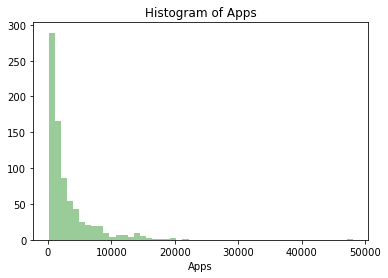

BoxPlot of Apps
----------------------------------------------------------------------------


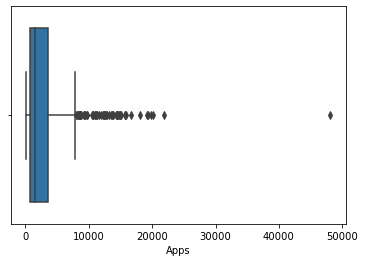

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 
Distribution of Accept
----------------------------------------------------------------------------


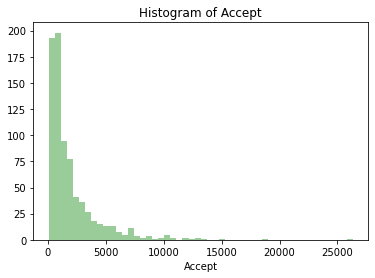

BoxPlot of Accept
----------------------------------------------------------------------------


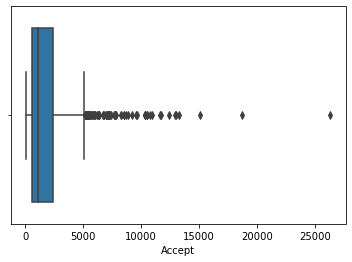

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 
Distribution of Enroll
----------------------------------------------------------------------------


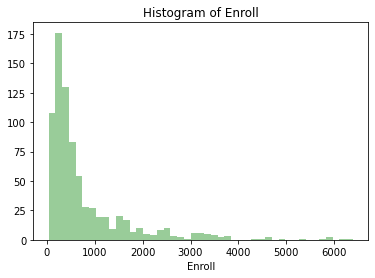

BoxPlot of Enroll
----------------------------------------------------------------------------


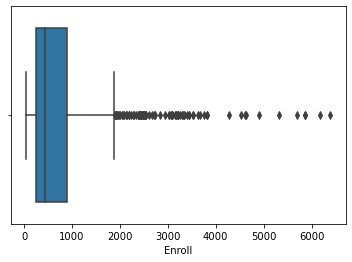

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 
Distribution of Top10perc
----------------------------------------------------------------------------


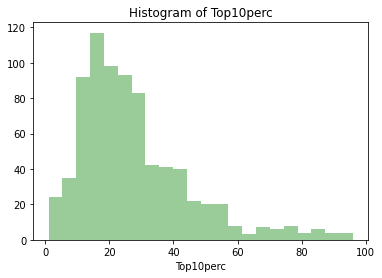

BoxPlot of Top10perc
----------------------------------------------------------------------------


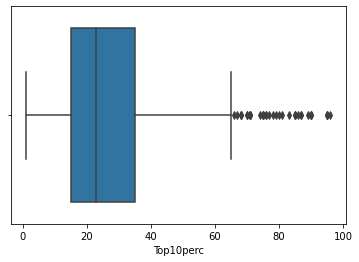

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 
Distribution of Top25perc
----------------------------------------------------------------------------


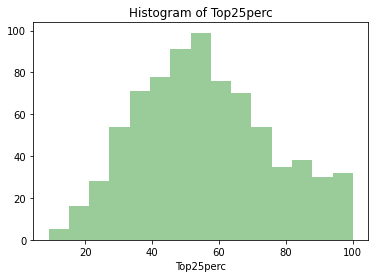

BoxPlot of Top25perc
----------------------------------------------------------------------------


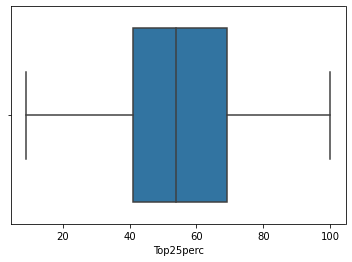

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 
Distribution of F.Undergrad
----------------------------------------------------------------------------


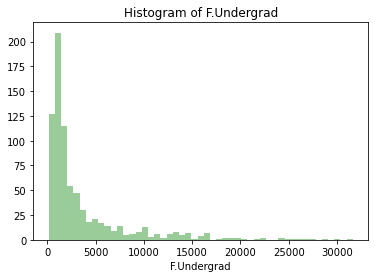

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


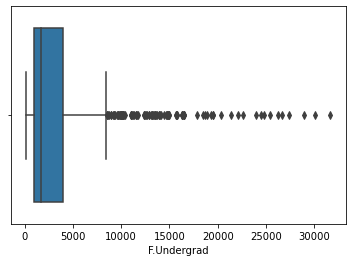

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 
Distribution of P.Undergrad
----------------------------------------------------------------------------


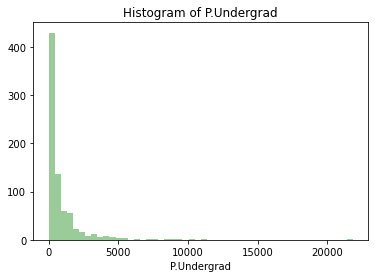

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


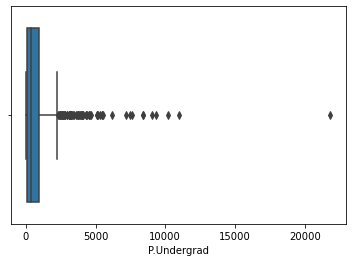

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 
Distribution of Outstate
----------------------------------------------------------------------------


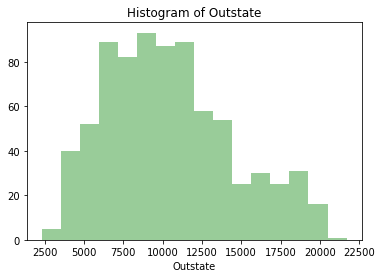

BoxPlot of Outstate
----------------------------------------------------------------------------


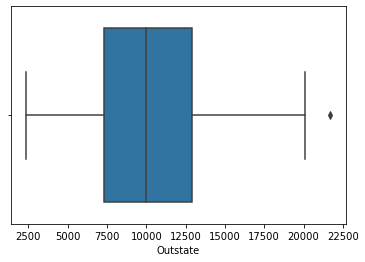

Description of Room.Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 
Distribution of Room.Board
----------------------------------------------------------------------------


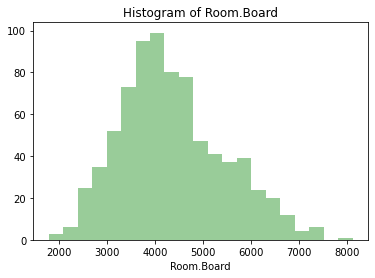

BoxPlot of Room.Board
----------------------------------------------------------------------------


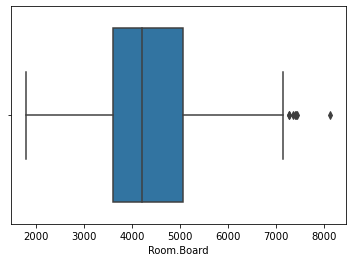

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 
Distribution of Books
----------------------------------------------------------------------------


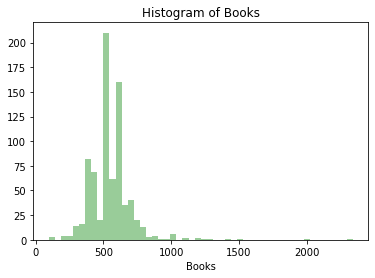

BoxPlot of Books
----------------------------------------------------------------------------


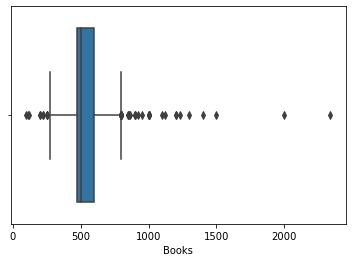

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 
Distribution of Personal
----------------------------------------------------------------------------


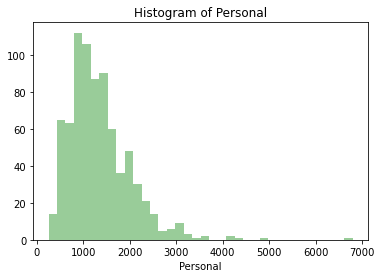

BoxPlot of Personal
----------------------------------------------------------------------------


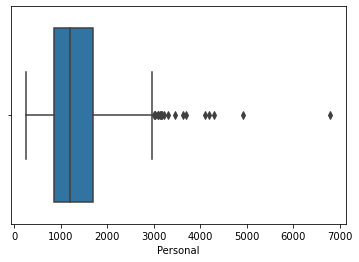

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 
Distribution of PhD
----------------------------------------------------------------------------


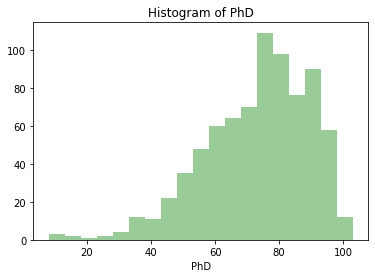

BoxPlot of PhD
----------------------------------------------------------------------------


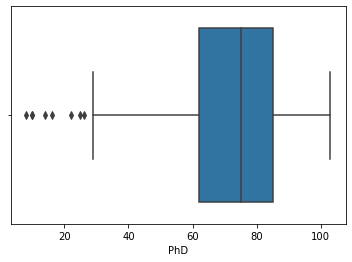

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 
Distribution of Terminal
----------------------------------------------------------------------------


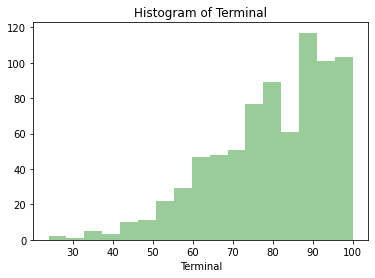

BoxPlot of Terminal
----------------------------------------------------------------------------


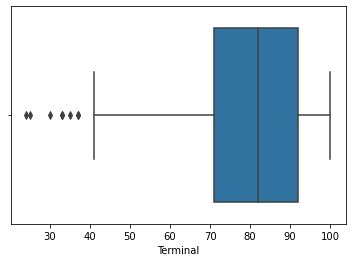

Description of S.F.Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64 
Distribution of S.F.Ratio
----------------------------------------------------------------------------


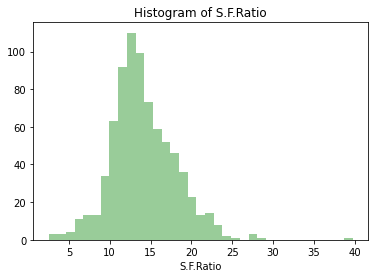

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


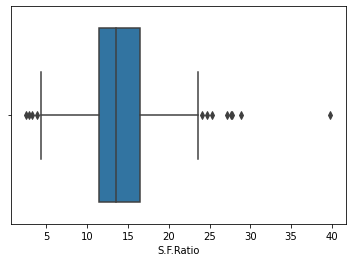

Description of perc.alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 
Distribution of perc.alumni
----------------------------------------------------------------------------


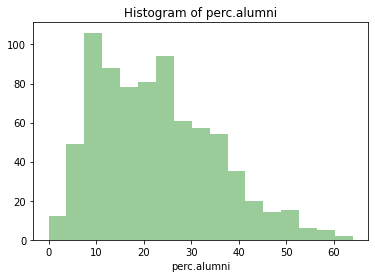

BoxPlot of perc.alumni
----------------------------------------------------------------------------


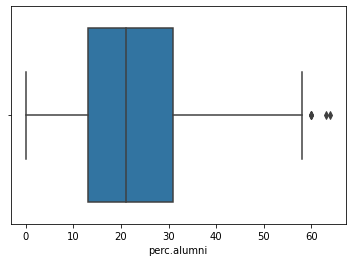

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 
Distribution of Expend
----------------------------------------------------------------------------


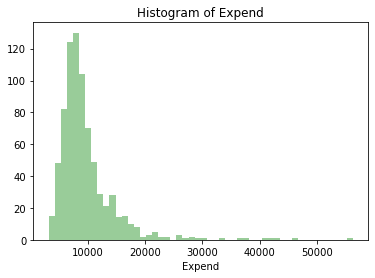

BoxPlot of Expend
----------------------------------------------------------------------------


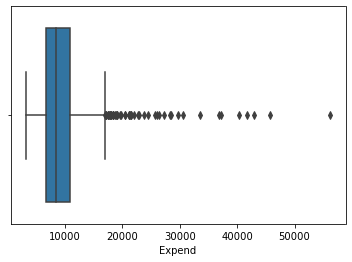

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64 
Distribution of Grad.Rate
----------------------------------------------------------------------------


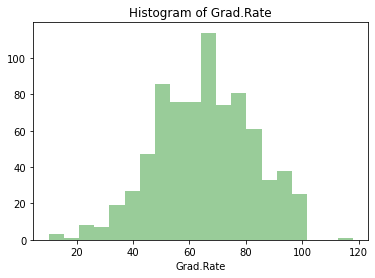

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


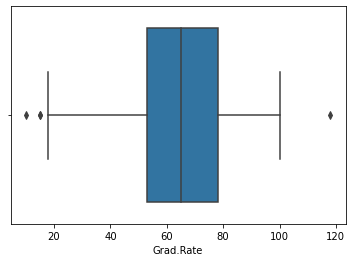

In [87]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [ ]:
Observations
1.There are 16 numeric fields, 1 field each of float and object data type in the dataset provided.

2.Customer age ranges from 18 years to 65 years

3.Only few customers have gross income more than 30L

4.Current interest rate ranges from 11.07% to 19.97% with an average of 16%

5.balance_tenure =0 (loans closed). Check outstanding_principal for these loans

6.Average EMI amount being paid is around 18012

7.Net Receivable of atleast 75% of customers is negative

8.Average foir is 0.42

9.Loan amount ranges from 175652 to max of 10893660

Outliers to be treated

In [24]:
#MULTIVARIATE ANALYSIS

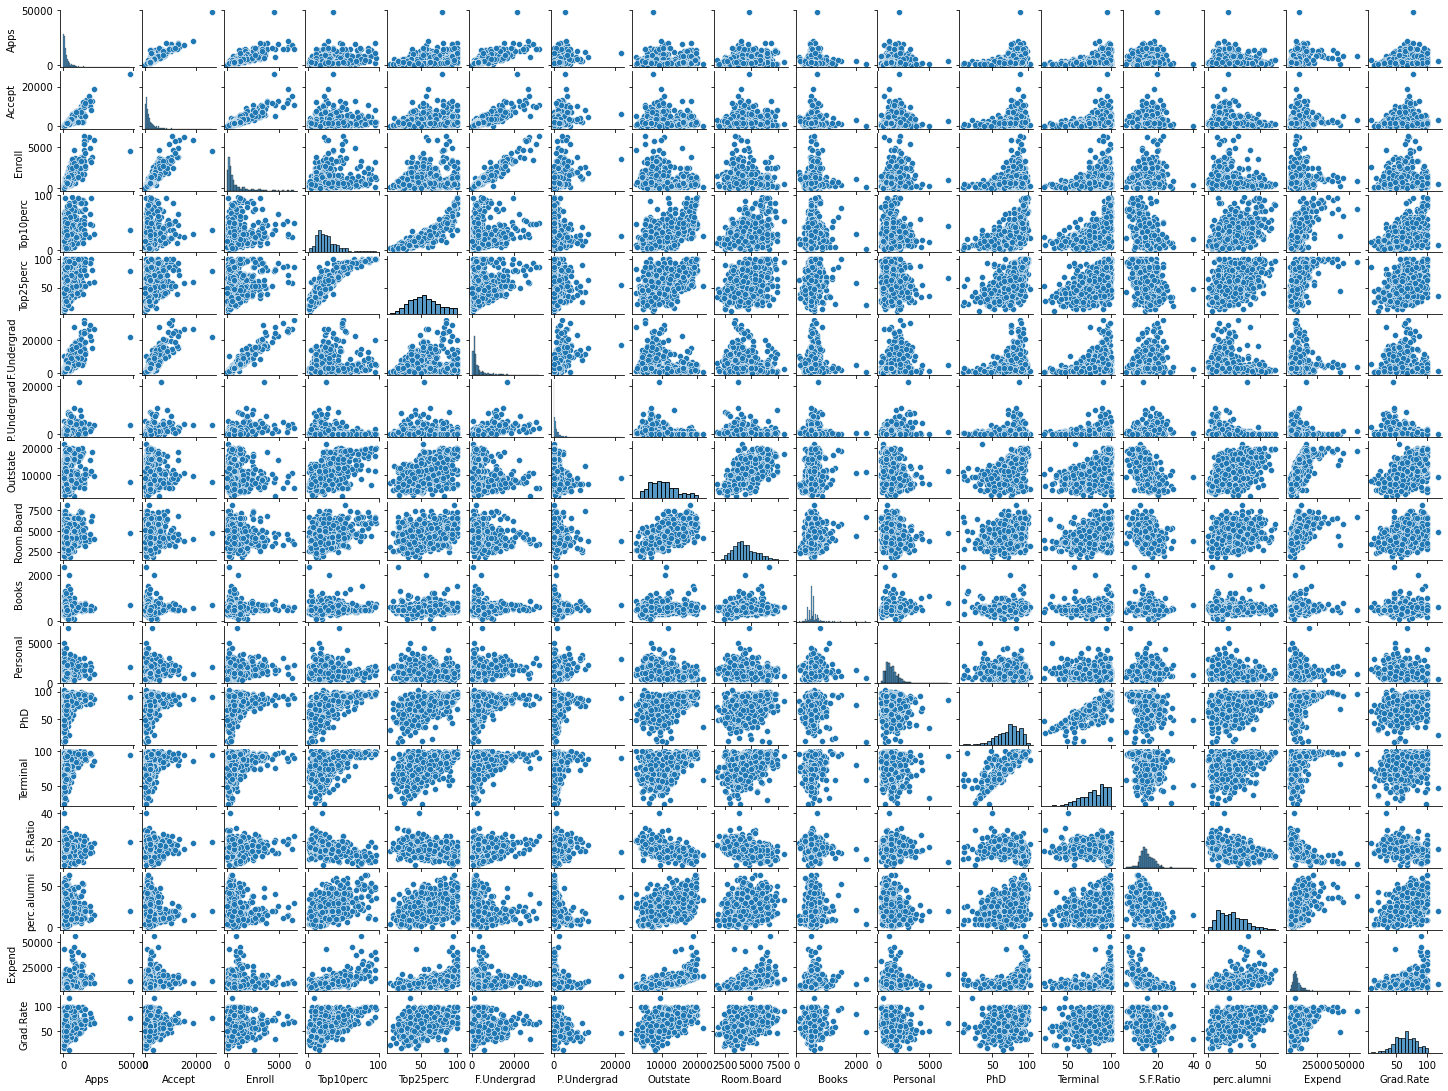

In [25]:
g=sns.pairplot(df2)
g.fig.set_figheight(15)
g.fig.set_figwidth(20)

plt.show()

In [82]:
corr = df2_num.corr(method='pearson')
corr

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


Text(0.5, 1.0, 'Heat map for the given dataset')

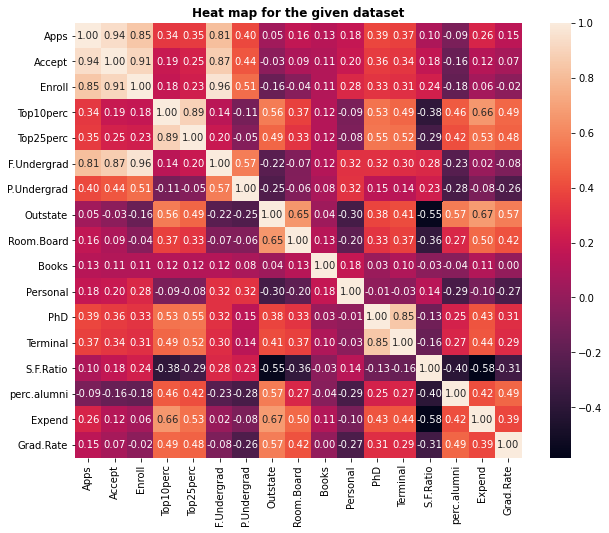

In [90]:
plt.figure(figsize = (10,8))
sns.heatmap(df2.corr(), annot=True,fmt='.2f');
plt.title("Heat map for the given dataset",fontweight='bold')

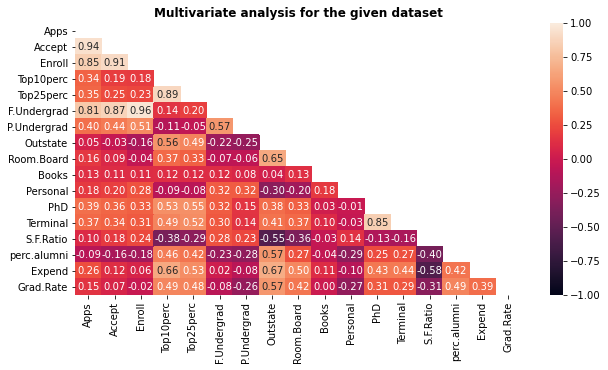

In [95]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10, 5))
sns.heatmap(df2_num.corr(), annot=True,fmt='.2f',mask=mask, vmin = -1, vmax = 1)
plt.title("Multivariate analysis for the given dataset",fontweight='bold')
plt.show()

In [27]:
df2['Names'].value_counts().sum()

777

<b>2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.</b>

In [28]:
#Drop all columns other than the ones suitable for PCA
df2_pca = df2.drop(['Names'], axis = 1)

In [29]:
#Dataframe suitable for PCA
df2_pca.head(10)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [30]:
#Check the number of features
len(df2_pca.columns)

17

In [31]:
#Scale the data
from scipy.stats import zscore
df2_pca_scaled = df2_pca.apply(zscore)

In [32]:
#Check the data post scaling
df2_pca_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [33]:
##########      NOT ASKED IN THE QUESTION ##############
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(df2_pca_scaled)

<b>2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]</b>

In [34]:
# Create covariance matrix
cov_matrix = np.cov(df2_pca_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [13]:
#Correaltion matrix
df2_pca_scaled.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


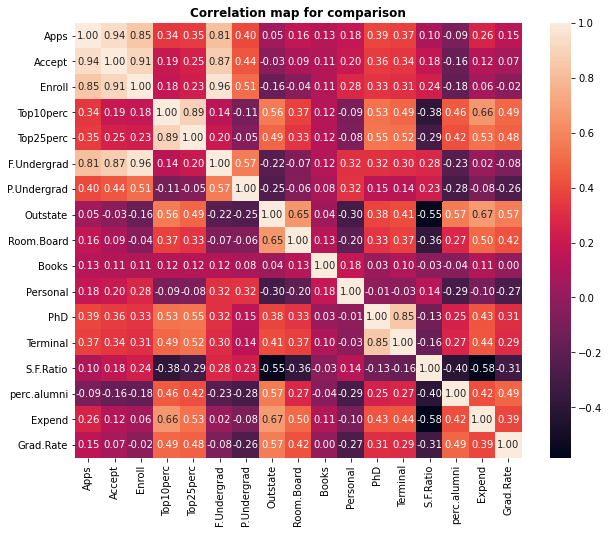

In [14]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
plt.title("Correlation map for comparison",fontweight='bold')
sns.heatmap(df2_pca_scaled.corr(), annot=True,fmt='.2f');

<b>2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?</b>

<b>BEFORE SCALING</b>

ValueError: num must be 1 <= num <= 12, not 13

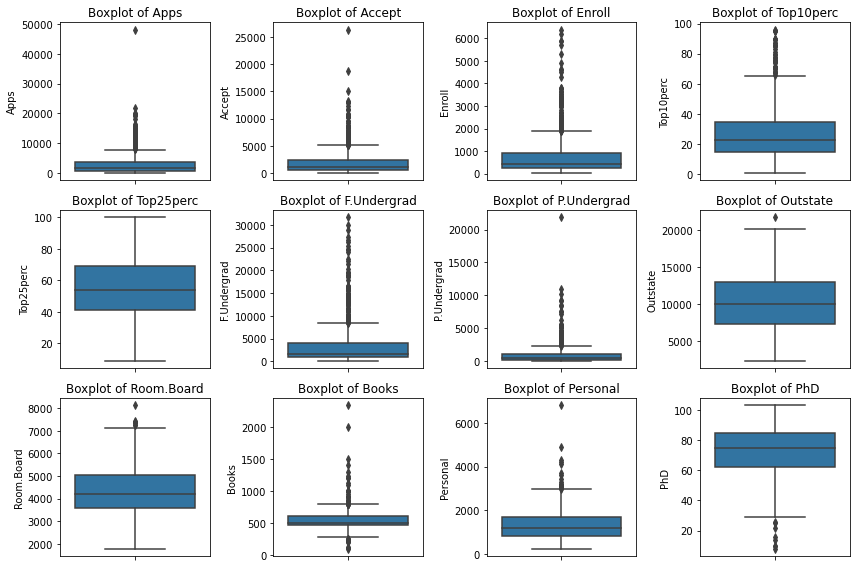

In [93]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
plt.title("Boxplot before scaling",fontweight='bold')
feature_list = df2_pca.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df2_pca[feature_list[i]], data = df2_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

<b>AFTER SCALING </b>

ValueError: num must be 1 <= num <= 12, not 13

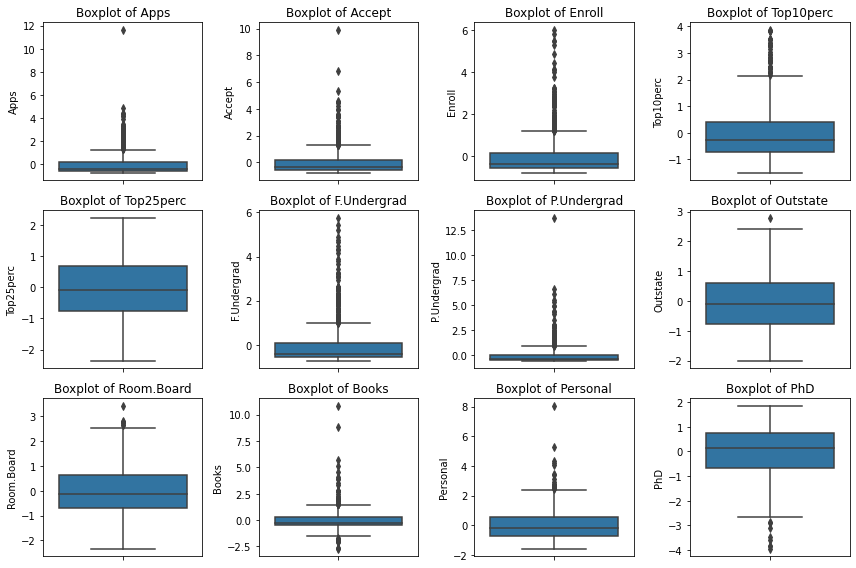

In [94]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df2_pca_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df2_pca_scaled[feature_list[i]], data = df2_pca_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

<b>**Insight drawn from the above treatment is that the outliers will remain as such before and after scaling if we dnt remove it explicitly</b>

<b>2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]</b>

In [15]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df2_pca_scaled)
p_value

0.0

In [16]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df2_pca_scaled)
kmo_model

0.8131251200373522

In [22]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(df2_pca_scaled)

In [23]:
 #Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
pca = PCA(n_components=33, random_state=123)
df2_pca = pca.fit_transform(df2_num_scaled)
print(df2_pca.transpose()) # Component output

#Eigen values for all 33 
print("######################################################")
print(pca.components_)


NameError: name 'df2_num_scaled' is not defined

In [24]:
#Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)



 Eigen Values 
 %s [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


Eigen Vectors 
 %s [[-2.48765602e-01  3.31598227e-01 -6.30921033e-02  2.81310530e-01
  -5.74140964e-03 -1.62374420e-02 -4.24863486e-02 -1.03090398e-01
  -9.02270802e-02  5.25098025e-02 -3.58970400e-01  4.59139498e-01
  -4.30462074e-02  1.33405806e-01 -8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01 -1.01249056e-01  2.67817346e-01
  -5.57860920e-02  7.53468452e-03 -1.29497196e-02 -5.62709623e-02
  -1.77864814e-01  4.11400844e-02  5.43427250e-01 -5.18568789e-01
   5.84055850e-02 -1.45497511e-01 -3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01 -8.29855709e-02  1.61826771e-01
   5.56936353e-02 -4.25579803e-02 -2.76928937e-02  5.86623552e-02
  -1.28560713e-01  3.44879147e-02 -6.09651110e-01 -4.04318439e-01
   6

In [35]:
#Extract eigen vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [36]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [43]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

<b>2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features</b>

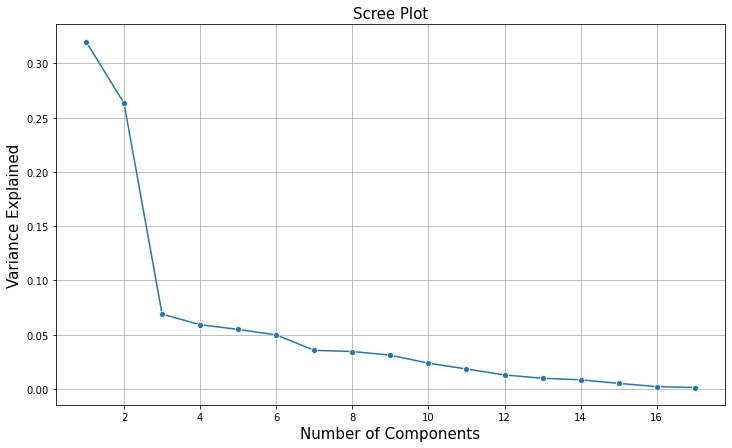

In [42]:
#scree plot
var_exp = pca.explained_variance_ratio_
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [51]:
#Create a dataframe containing the loadings or coefficients of all PCs
df2_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'],
                                    index = df2_pca_scaled.columns)

In [52]:
df2_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486,-0.103090,-0.090227,0.052510,0.043046,0.024071,0.595831,0.080633,0.133406,0.459139,0.358970
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950,-0.056271,-0.177865,0.041140,-0.058406,-0.145102,0.292642,0.033467,-0.145498,-0.518569,-0.543427
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693,0.058662,-0.128561,0.034488,-0.069399,0.011143,-0.444638,-0.085697,0.029590,-0.404318,0.609651
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332,-0.122678,0.341100,0.064026,-0.008105,0.038554,0.001023,-0.107828,0.697723,-0.148739,-0.144986
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486,-0.102492,0.403712,0.014549,-0.273128,-0.089352,0.021884,0.151742,-0.617275,0.051868,0.080348
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076,0.078890,-0.059442,0.020847,-0.081158,0.056177,-0.523622,-0.056373,0.009916,0.560363,-0.414705
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042,0.570784,0.560673,-0.223106,0.100693,-0.063536,0.125998,0.019286,0.020952,-0.052731,0.009018
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529,0.009846,-0.004573,0.186675,0.143221,-0.823444,-0.141856,-0.034012,0.038354,0.101595,0.050900
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744,-0.221453,0.275023,0.298324,-0.359322,0.354560,-0.069749,-0.058429,0.003402,-0.025929,0.001146
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692,0.213293,-0.133663,-0.082029,0.031940,-0.028159,0.011438,-0.066849,-0.009439,0.002883,0.000773


<b>2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]</b>

In [53]:
pca.components_[0]

array([ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
        0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
       -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
        0.31890875,  0.25231565])

In [54]:
print ("the linear equation of first component:")
for i in range (0,df2_pca.shape[1]):
    print ('{}*{}'.format(np.round(pca.components_[0][i],3),df2_pca.columns[i]),end = '+')

the linear equation of first component:
0.249*Apps+0.208*Accept+0.176*Enroll+0.354*Top10perc+0.344*Top25perc+0.155*F.Undergrad+0.026*P.Undergrad+0.295*Outstate+0.249*Room.Board+0.065*Books+-0.043*Personal+0.318*PhD+0.317*Terminal+-0.177*S.F.Ratio+0.205*perc.alumni+0.319*Expend+0.252*Grad.Rate+

<b>2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?</b>

In [55]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

<b>2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]</b>

In [66]:
#Choose the PCs basis cumulative explained variance
df2_selected = df2_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8']]

In [67]:
#Check the selected PCs
df2_selected.T

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
PC1,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
PC2,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
PC3,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
PC4,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
PC5,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268
PC6,-0.016237,0.007535,-0.042558,-0.052693,0.033092,-0.043454,-0.191199,-0.030000,0.162755,0.641055,-0.331398,0.091256,0.154928,0.487046,-0.047340,-0.298119,0.216163
PC7,-0.042486,-0.012950,-0.027693,-0.161332,-0.118486,-0.025076,0.061042,0.108529,0.209744,-0.149692,0.633790,-0.001096,-0.028477,0.219259,0.243321,-0.226584,0.559944
PC8,-0.103090,-0.056271,0.058662,-0.122678,-0.102492,0.078890,0.570784,0.009846,-0.221453,0.213293,-0.232661,-0.077040,-0.012161,-0.083605,0.678524,-0.054159,-0.005336


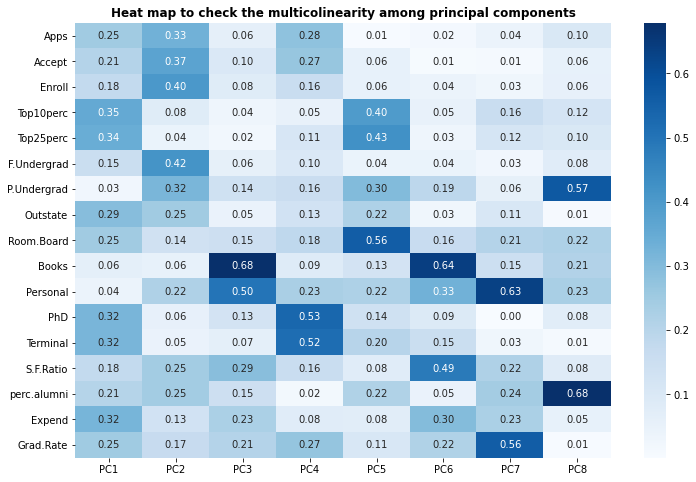

In [72]:
plt.figure(figsize = (12,8))
plt.title("Heat map to check the multicolinearity among principal components",fontweight='bold')
sns.heatmap(abs(df2_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [61]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=8, random_state=123)
pca_final = pca.fit_transform(df2_pca_scaled)

In [62]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df2_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.592855,0.767334,-0.101074,-0.921749,-0.743975,-0.298306,0.638443,-0.879386
1,-2.192402,-0.578830,2.278798,3.588918,1.059997,-0.177137,0.236753,0.046925
2,-1.430964,-1.092819,-0.438093,0.677241,-0.369613,-0.960592,-0.248276,0.308740
3,2.855557,-2.630612,0.141722,-1.295486,-0.183837,-1.059508,-1.249356,-0.147694
4,-2.212008,0.021631,2.387030,-1.114538,0.684451,0.004918,-2.159220,-0.624413
5,-0.571665,-1.496325,0.024354,0.066944,-0.376261,-0.668344,-1.609835,-0.529391
6,0.241952,-1.506368,0.234194,-1.142024,1.546983,-0.009995,0.590933,-0.329858
7,1.750474,-1.461412,-1.026589,-0.981184,0.217044,0.222924,0.038169,0.173929
8,0.769127,-1.984433,-1.426052,-0.071424,0.586380,-0.655179,-0.213314,-0.275114
9,-2.770721,-0.844611,1.627987,1.705091,-1.019826,-0.794401,-0.317891,-0.160687


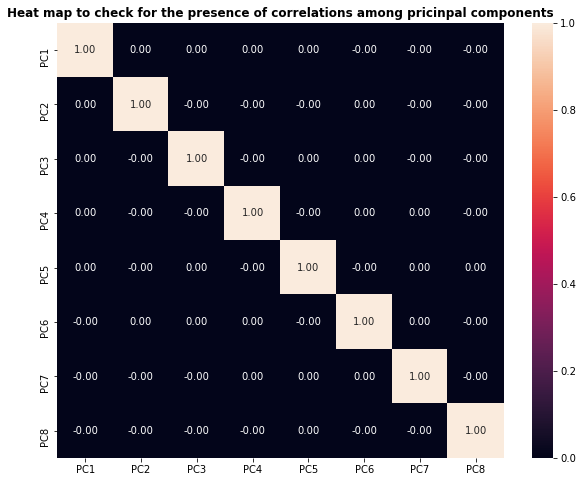

In [63]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
plt.title("Heat map to check for the presence of correlations among pricinpal components",fontweight='bold')
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');